# Storytelling Data Visualization on Exchange Rates
## Goal: Show how the euro-dollar rate has changed during the coronavirus pandemic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Printing first few rows of the dataset

In [2]:
directory = 'C:/Personal Projects/Dataquest/Python Project/Storytelling Data Visualization on Exchange Rates/'
df = pd.read_csv(directory + 'euro-daily-hist_1999_2022.csv')
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


## Data Exploration

In [3]:
df.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [5]:
df.describe(include='all')

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
count,6456,6456,6054,6188,6456,6456,6188,2346,6456,6456,...,6394.000000,5994,6456,6456,2085,2608,6456,6394.000000,6456,6456
unique,6456,3665,106,5587,3092,3331,5408,498,4080,493,...,NaN,5705,5013,3937,1377,2014,5621,NaN,3769,6204
top,2023-12-15,-,1.9558,-,-,-,-,0.58420,27.021,-,...,NaN,-,-,-,239.5000,-,-,NaN,-,-
freq,1,62,4721,61,62,62,61,108,120,62,...,NaN,62,62,62,44,48,62,NaN,62,62
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.994083,NaN,NaN,NaN,NaN,NaN,NaN,4.475381,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.879893,NaN,NaN,NaN,NaN,NaN,NaN,5.675173,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.291200,NaN,NaN,NaN,NaN,NaN,NaN,0.370100,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.563525,NaN,NaN,NaN,NaN,NaN,NaN,1.735225,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.296000,NaN,NaN,NaN,NaN,NaN,NaN,2.259350,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.598225,NaN,NaN,NaN,NaN,NaN,NaN,4.179875,NaN,NaN


In [6]:
df.dtypes

Period\Unit:                 object
[Australian dollar ]         object
[Bulgarian lev ]             object
[Brazilian real ]            object
[Canadian dollar ]           object
[Swiss franc ]               object
[Chinese yuan renminbi ]     object
[Cypriot pound ]             object
[Czech koruna ]              object
[Danish krone ]              object
[Estonian kroon ]            object
[UK pound sterling ]         object
[Greek drachma ]             object
[Hong Kong dollar ]          object
[Croatian kuna ]             object
[Hungarian forint ]          object
[Indonesian rupiah ]         object
[Israeli shekel ]            object
[Indian rupee ]              object
[Iceland krona ]            float64
[Japanese yen ]              object
[Korean won ]                object
[Lithuanian litas ]          object
[Latvian lats ]              object
[Maltese lira ]              object
[Mexican peso ]              object
[Malaysian ringgit ]         object
[Norwegian krone ]          

In [7]:
df.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

## Data Cleaning and Transformation

In [8]:
df.rename({'[US dollar ]':'US_dollar', 'Period\\Unit:':'Time'}, axis=1, inplace=True)

In [9]:
df.columns

Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'US_dollar',
       '[South African rand ]'],
      dtype='object')

In [10]:
df.Time = pd.to_datetime(df.Time)

In [11]:
df.sort_values('Time', inplace=True)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441
6452,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
6453,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
6454,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693


In [14]:
euro_to_dollar = df[['Time', 'US_dollar']]
euro_to_dollar

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
6451,2023-12-11,1.0757
6452,2023-12-12,1.0804
6453,2023-12-13,1.0787
6454,2023-12-14,1.0919


In [15]:
euro_to_dollar.US_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

- We can see that there are 62 rows that is saved as value "-"

In [16]:
value = euro_to_dollar.US_dollar == '-'
euro_to_dollar = euro_to_dollar[~value]

In [17]:
euro_to_dollar.US_dollar.value_counts()

1.2276    9
1.1215    8
1.0888    7
1.0868    7
1.1305    7
         ..
1.4304    1
1.4350    1
1.4442    1
1.4389    1
1.0804    1
Name: US_dollar, Length: 3768, dtype: int64

In [18]:
euro_to_dollar.US_dollar = euro_to_dollar.US_dollar.astype('float')

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\2547668934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar.US_dollar = euro_to_dollar.US_dollar.astype('float')


In [19]:
euro_to_dollar.dtypes

Time         datetime64[ns]
US_dollar           float64
dtype: object

## Calculating the rolling means for the US_dollar column using a moving window of 30 days

In [20]:
euro_to_dollar['rolling_mean'] = euro_to_dollar.US_dollar.rolling(30).mean()

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\4033809142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['rolling_mean'] = euro_to_dollar.US_dollar.rolling(30).mean()


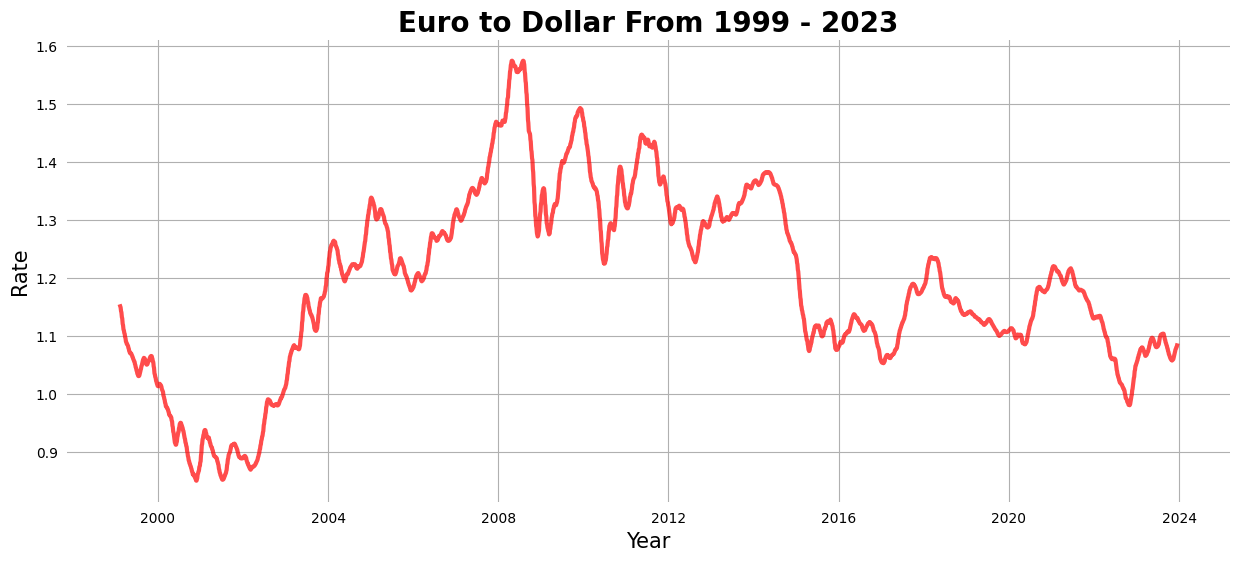

In [21]:
plt.figure(figsize=(15,6))
plt.plot(euro_to_dollar.Time, euro_to_dollar.rolling_mean, color='red', alpha=0.7, linewidth=3)
plt.title('Euro to Dollar From 1999 - 2023', size=20, weight='bold')
plt.xlabel('Year', size = 15)
plt.ylabel('Rate', size = 15)
ax = plt.gca()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.grid('on')

In [22]:
euro_to_dollar['year'] = euro_to_dollar.Time.dt.year

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\2581426801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['year'] = euro_to_dollar.Time.dt.year


In [23]:
corona = euro_to_dollar[(euro_to_dollar.year>=2018) & (euro_to_dollar.year < 2022)]

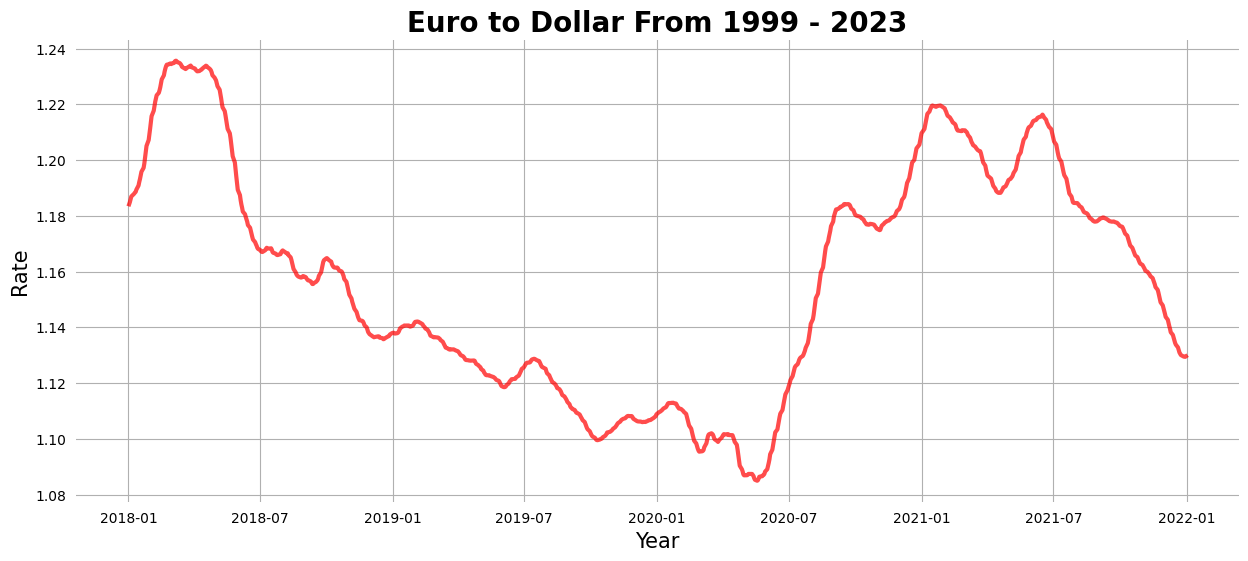

In [24]:
plt.figure(figsize=(15,6))
plt.plot(corona.Time, corona.rolling_mean, color='red', alpha=0.7, linewidth=3)
plt.title('Euro to Dollar From 1999 - 2023', size=20, weight='bold')
plt.xlabel('Year', size = 15)
plt.ylabel('Rate', size = 15)
ax = plt.gca()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.grid('on')

- Covid hit Dec, 2019. After that, it started to fall down.
- Around 2020 March-April, it started to fall more
- Around 2020 June, it started going back up

## Creating a graph for multiple currencies

In [25]:
df.columns

Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'US_dollar',
       '[South African rand ]'],
      dtype='object')

In [26]:
df.rename({'Time':'time', '[Korean won ]': 'won', '[Japanese yen ]': 'yen', '[Mexican peso ]':'peso', 
          'US_dollar':'dollar'}, axis=1, inplace=True)

In [27]:
df.columns

Index(['time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', 'yen', 'won', '[Lithuanian litas ]',
       '[Latvian lats ]', '[Maltese lira ]', 'peso', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', 'dollar',
       '[South African rand ]'],
      dtype='object')

In [28]:
multiple = df[['time', 'yen', 'won', 'peso', 'dollar']]

In [29]:
multiple

,time,yen,won,peso,dollar
0,1999-01-04,133.73,1398.59,11.6446,1.1789
1,1999-01-05,130.96,1373.01,11.5960,1.1790
2,1999-01-06,131.42,1359.54,11.4705,1.1743
3,1999-01-07,129.43,1337.16,11.5511,1.1632
4,1999-01-08,130.09,1366.73,11.4414,1.1659
...,...,...,...,...,...
6451,2023-12-11,157.54,1420.71,18.7319,1.0757
6452,2023-12-12,156.84,1415.21,18.7419,1.0804
6453,2023-12-13,157.13,1422.86,18.687,1.0787
6454,2023-12-14,154.8,1412.66,18.9001,1.0919


In [30]:
yen_bool = multiple.yen == '-'
multiple = multiple[~yen_bool]
multiple

,time,yen,won,peso,dollar
0,1999-01-04,133.73,1398.59,11.6446,1.1789
1,1999-01-05,130.96,1373.01,11.5960,1.1790
2,1999-01-06,131.42,1359.54,11.4705,1.1743
3,1999-01-07,129.43,1337.16,11.5511,1.1632
4,1999-01-08,130.09,1366.73,11.4414,1.1659
...,...,...,...,...,...
6451,2023-12-11,157.54,1420.71,18.7319,1.0757
6452,2023-12-12,156.84,1415.21,18.7419,1.0804
6453,2023-12-13,157.13,1422.86,18.687,1.0787
6454,2023-12-14,154.8,1412.66,18.9001,1.0919


In [36]:
multiple.yen = multiple.yen.astype('float')
multiple.won = multiple.won.astype('float')
multiple.peso = multiple.peso.astype('float')
multiple.dollar = multiple.dollar.astype('float')

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\2427732073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple.yen = multiple.yen.astype('float')
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\2427732073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple.won = multiple.won.astype('float')
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\2427732073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [37]:
multiple.dtypes

time      datetime64[ns]
yen              float64
won              float64
peso             float64
dollar           float64
dtype: object

In [38]:
multiple['yrm'] = multiple.yen.rolling(30).mean()
multiple['wrm'] = multiple.won.rolling(30).mean()
multiple['prm'] = multiple.peso.rolling(30).mean()
multiple['drm'] = multiple.dollar.rolling(30).mean()

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\881118941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple['yrm'] = multiple.yen.rolling(30).mean()
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\881118941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple['wrm'] = multiple.won.rolling(30).mean()
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\881118941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [45]:
multiple

,time,yen,won,peso,dollar,yrm,wrm,prm,drm
0,1999-01-04,133.73,1398.59,11.6446,1.1789,NaN,NaN,NaN,NaN
1,1999-01-05,130.96,1373.01,11.5960,1.1790,NaN,NaN,NaN,NaN
2,1999-01-06,131.42,1359.54,11.4705,1.1743,NaN,NaN,NaN,NaN
3,1999-01-07,129.43,1337.16,11.5511,1.1632,NaN,NaN,NaN,NaN
4,1999-01-08,130.09,1366.73,11.4414,1.1659,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6451,2023-12-11,157.54,1420.71,18.7319,1.0757,160.952000,1414.816667,18.794400,1.080143
6452,2023-12-12,156.84,1415.21,18.7419,1.0804,160.836667,1414.168333,18.780627,1.080760
6453,2023-12-13,157.13,1422.86,18.6870,1.0787,160.763333,1413.958333,18.772003,1.081593
6454,2023-12-14,154.80,1412.66,18.9001,1.0919,160.593667,1413.809333,18.776927,1.082453


In [46]:
multiple.yrm = multiple.yrm.div(100)
multiple.wrm = multiple.wrm.div(1000)
multiple.prm = multiple.prm.div(10)

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\1767494477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple.yrm = multiple.yrm.div(100)
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\1767494477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple.wrm = multiple.wrm.div(1000)
C:\Users\andya\AppData\Local\Temp\ipykernel_13468\1767494477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

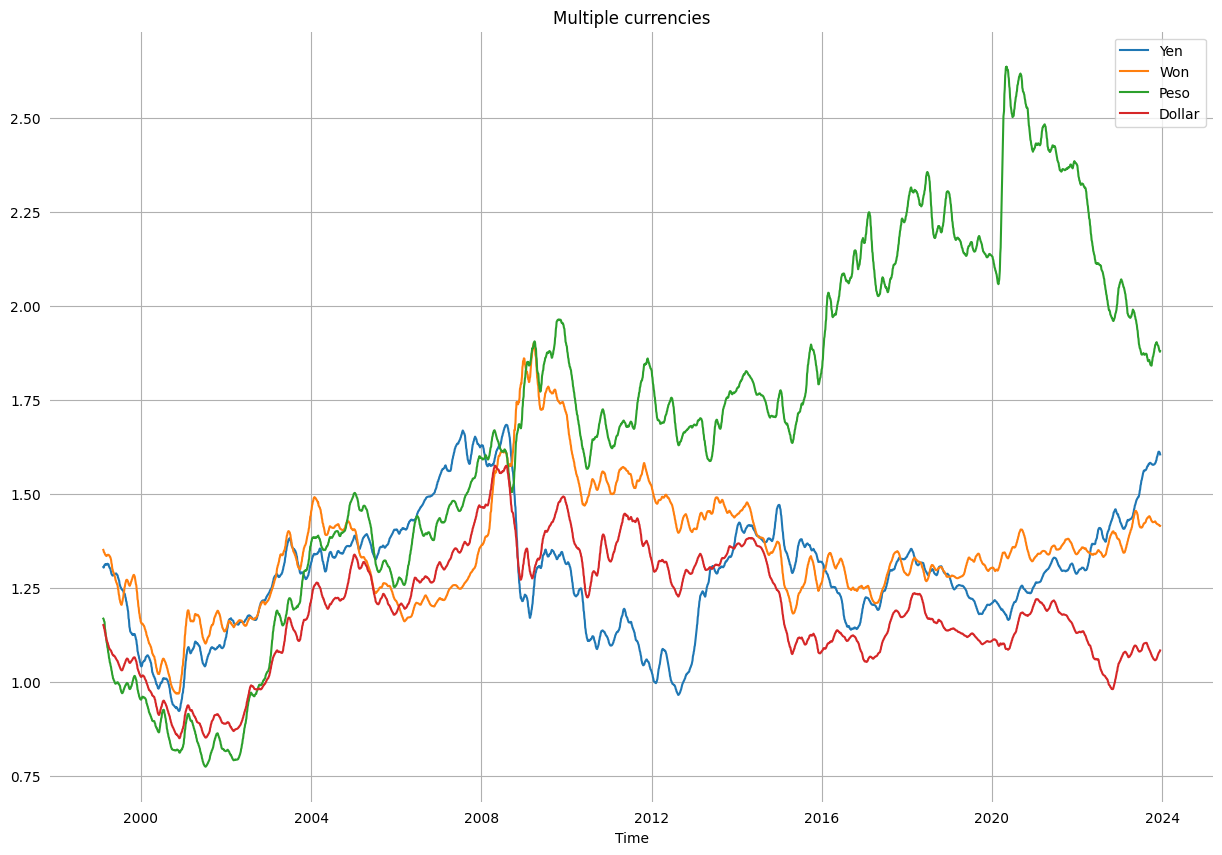

In [48]:
plt.figure(figsize=(15,10))
plt.plot(multiple.time, multiple.yrm, label='Yen')
plt.plot(multiple.time, multiple.wrm, label='Won')
plt.plot(multiple.time, multiple.prm, label='Peso')
plt.plot(multiple.time, multiple.drm, label='Dollar')
plt.title('Multiple currencies')
plt.xlabel('Time')
plt.legend()
ax = plt.gca()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.grid('on')
plt.show()

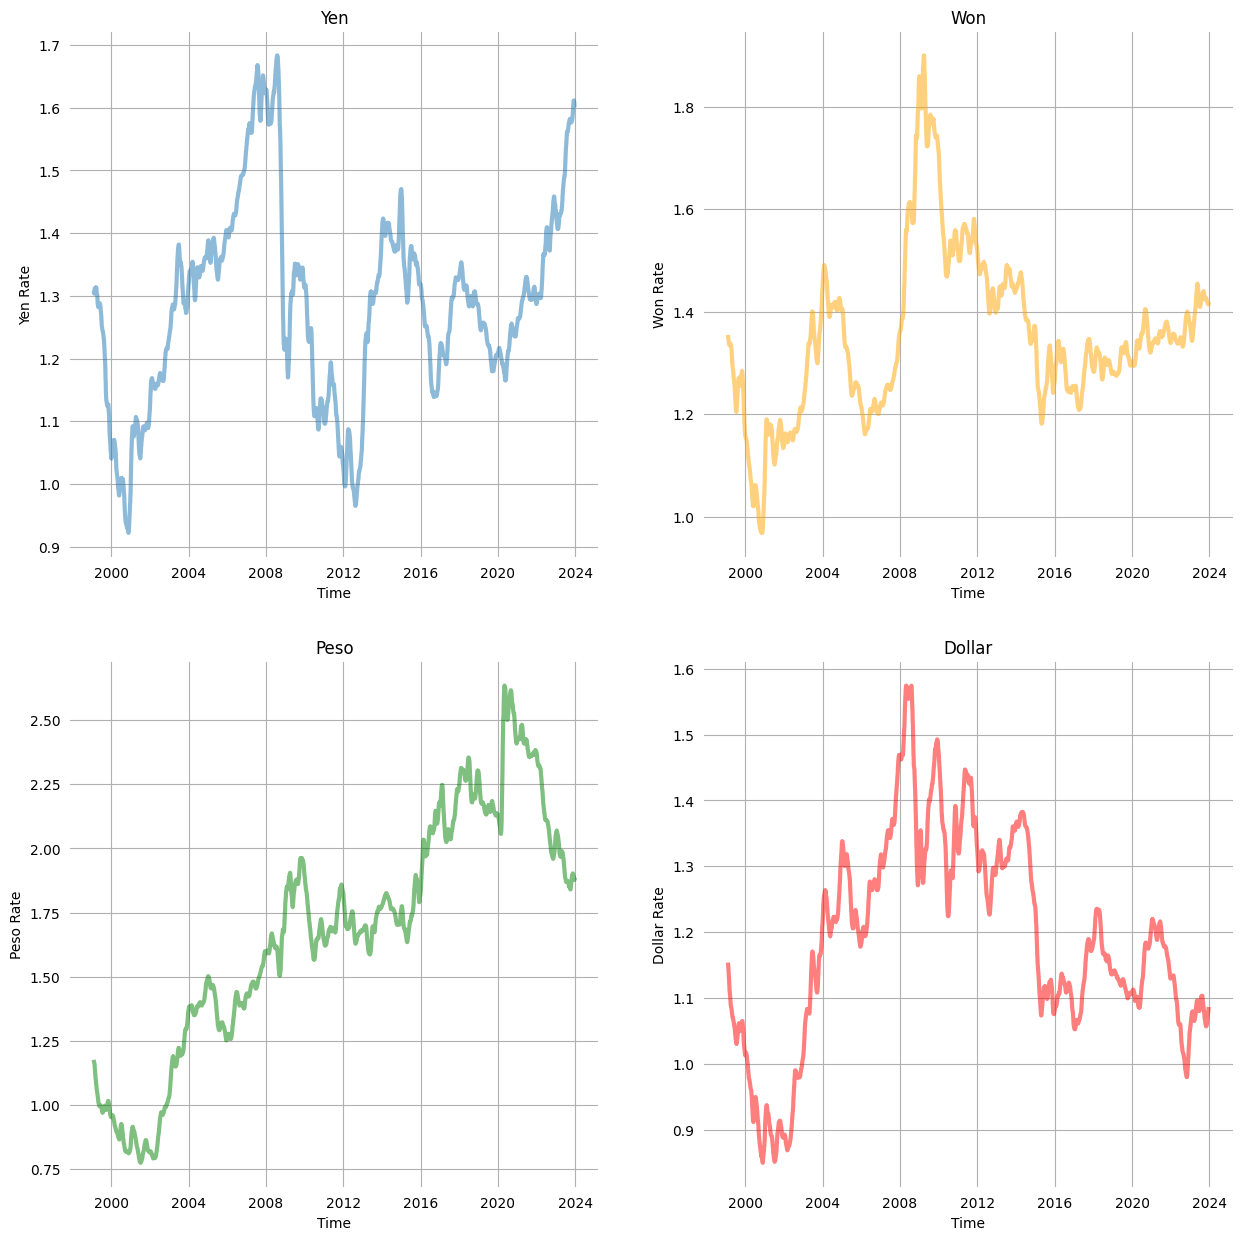

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols = 2, figsize = (15, 15))
ax1.plot(multiple.time, multiple.yrm, alpha = 0.5, linewidth = 3)
ax1.title.set_text('Yen')
ax1.set_xlabel('Time')
ax1.set_ylabel('Yen Rate')
for location in ['left','right','top','bottom']:
    ax1.spines[location].set_visible(False)
ax1.tick_params(bottom=False, left=False)
ax1.grid('on')

ax2.plot(multiple.time, multiple.wrm, alpha = 0.5, linewidth = 3, color='orange')
ax2.title.set_text('Won')
ax2.set_xlabel('Time')
ax2.set_ylabel('Won Rate')
for location in ['left','right','top','bottom']:
    ax2.spines[location].set_visible(False)
ax2.tick_params(bottom=False, left=False) 
ax2.grid('on')

ax3.plot(multiple.time, multiple.prm, alpha = 0.5, linewidth = 3, color='green')
ax3.title.set_text('Peso')
ax3.set_xlabel('Time')
ax3.set_ylabel('Peso Rate')
for location in ['left','right','top','bottom']:
    ax3.spines[location].set_visible(False)
ax3.tick_params(bottom=False, left=False)
ax3.grid('on')

ax4.plot(multiple.time, multiple.drm, alpha = 0.5, linewidth = 3, color='red')
ax4.title.set_text('Dollar')
ax4.set_xlabel('Time')
ax4.set_ylabel('Dollar Rate')
for location in ['left','right','top','bottom']:
    ax4.spines[location].set_visible(False)
ax4.tick_params(bottom=False, left=False)
ax4.grid('on')

In [64]:
multiple['year'] = multiple.time.dt.year

C:\Users\andya\AppData\Local\Temp\ipykernel_13468\1922894960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple['year'] = multiple.time.dt.year


In [66]:
covid_time = multiple[(multiple.year > 2018) & (multiple.year < 2022)]

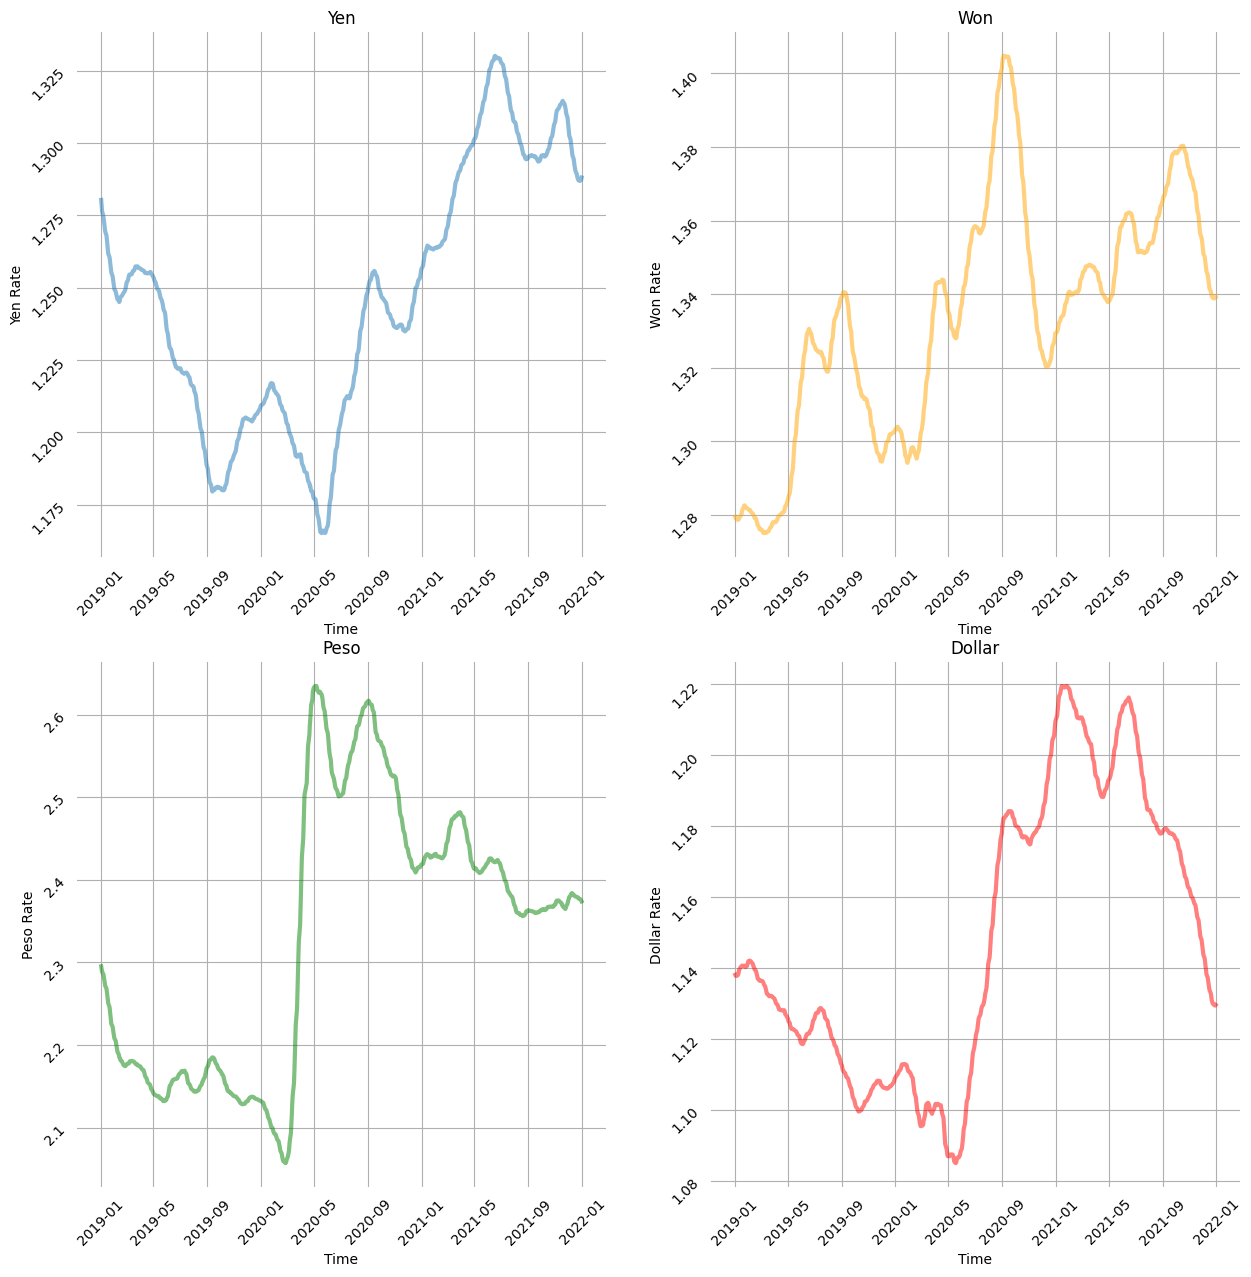

In [70]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols = 2, figsize = (15, 15))
ax1.plot(covid_time.time, covid_time.yrm, alpha = 0.5, linewidth = 3)
ax1.title.set_text('Yen')
ax1.set_xlabel('Time')
ax1.set_ylabel('Yen Rate')
ax1.tick_params(rotation=45)
for location in ['left','right','top','bottom']:
    ax1.spines[location].set_visible(False)
ax1.tick_params(bottom=False, left=False)
ax1.grid('on')

ax2.plot(covid_time.time, covid_time.wrm, alpha = 0.5, linewidth = 3, color='orange')
ax2.title.set_text('Won')
ax2.set_xlabel('Time')
ax2.set_ylabel('Won Rate')
ax2.tick_params(rotation=45)
for location in ['left','right','top','bottom']:
    ax2.spines[location].set_visible(False)
ax2.tick_params(bottom=False, left=False) 
ax2.grid('on')

ax3.plot(covid_time.time, covid_time.prm, alpha = 0.5, linewidth = 3, color='green')
ax3.title.set_text('Peso')
ax3.set_xlabel('Time')
ax3.set_ylabel('Peso Rate')
ax3.tick_params(rotation=45)
for location in ['left','right','top','bottom']:
    ax3.spines[location].set_visible(False)
ax3.tick_params(bottom=False, left=False)
ax3.grid('on')

ax4.plot(covid_time.time, covid_time.drm, alpha = 0.5, linewidth = 3, color='red')
ax4.title.set_text('Dollar')
ax4.set_xlabel('Time')
ax4.set_ylabel('Dollar Rate')
ax4.tick_params(rotation=45)
for location in ['left','right','top','bottom']:
    ax4.spines[location].set_visible(False)
ax4.tick_params(bottom=False, left=False)
ax4.grid('on')